In [1]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")

# Load the Data

In [2]:
from model_utils import load_X_y

X, y = load_X_y()

# Categorical Target Thresholding

In [3]:
import matplotlib.pyplot as plt
plt.style.use('default')

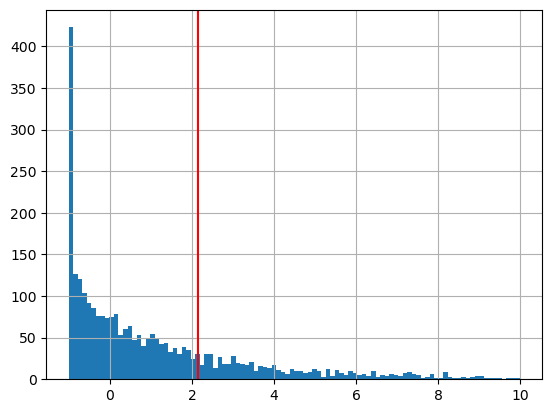

In [4]:
from model_utils import categorical_threasholding_y

y = categorical_threasholding_y(y, single_percentile=0.27)

# Split the Data

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2160, 224), (721, 224), (2160,), (721,))

# Feature Selection

using only movie-related features 


In [6]:
type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [34]:
from model_utils import boruta_feature_selection

X_train_sel, X_test_sel = boruta_feature_selection(X_train, X_test, y_train, max_iter = 100)

Iteration: 1 / 100
Iteration: 2 / 100
Iteration: 3 / 100
Iteration: 4 / 100
Iteration: 5 / 100
Iteration: 6 / 100
Iteration: 7 / 100
Iteration: 8 / 100
Iteration: 9 / 100
Iteration: 10 / 100
Iteration: 11 / 100
Iteration: 12 / 100
Iteration: 13 / 100
Iteration: 14 / 100
Iteration: 15 / 100
Iteration: 16 / 100
Iteration: 17 / 100
Iteration: 18 / 100
Iteration: 19 / 100
Iteration: 20 / 100
Iteration: 21 / 100
Iteration: 22 / 100
Iteration: 23 / 100
Iteration: 24 / 100
Iteration: 25 / 100
Iteration: 26 / 100
Iteration: 27 / 100
Iteration: 28 / 100
Iteration: 29 / 100
Iteration: 30 / 100
Iteration: 31 / 100
Iteration: 32 / 100
Iteration: 33 / 100
Iteration: 34 / 100
Iteration: 35 / 100
Iteration: 36 / 100
Iteration: 37 / 100
Iteration: 38 / 100
Iteration: 39 / 100
Iteration: 40 / 100
Iteration: 41 / 100
Iteration: 42 / 100
Iteration: 43 / 100
Iteration: 44 / 100
Iteration: 45 / 100
Iteration: 46 / 100
Iteration: 47 / 100
Iteration: 48 / 100
Iteration: 49 / 100
Iteration: 50 / 100
Iteration

In [8]:
X_train_sel.shape, X_test_sel.shape

((2160, 36), (721, 36))

# MERGING GRIDSEARCH

In [9]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from model_utils import run_grid_search

cv_results = run_grid_search(X_train_sel, y_train)

Fitting 5 folds for each of 386 candidates, totalling 1930 fits
[CV] END clf=SVC(), clf__C=0.1, clf__gamma=1, clf__kernel=rbf, marcro_drop=passthrough; total time=   0.6s
[CV] END clf=SVC(), clf__C=0.1, clf__gamma=1, clf__kernel=rbf, marcro_drop=passthrough; total time=   0.6s
[CV] END clf=SVC(), clf__C=0.1, clf__gamma=1, clf__kernel=rbf, marcro_drop=passthrough; total time=   0.6s
[CV] END clf=SVC(), clf__C=0.1, clf__gamma=1, clf__kernel=rbf, marcro_drop=passthrough; total time=   0.6s
[CV] END clf=SVC(), clf__C=0.1, clf__gamma=1, clf__kernel=rbf, marcro_drop=passthrough; total time=   0.6s
[CV] END clf=SVC(), clf__C=0.1, clf__gamma=1, clf__kernel=rbf, marcro_drop=<settings.columnDropperTransformer object at 0x12b078070>; total time=   0.6s
[CV] END clf=SVC(), clf__C=0.1, clf__gamma=1, clf__kernel=rbf, marcro_drop=<settings.columnDropperTransformer object at 0x12b078070>; total time=   0.6s
[CV] END clf=SVC(), clf__C=0.1, clf__gamma=1, clf__kernel=rbf, marcro_drop=<settings.columnDrop

In [21]:
cv_results

,param_clf,param_clf__C,param_clf__gamma,param_clf__kernel,param_marcro_drop,param_clf__penalty,param_clf__solver,param_clf__var_smoothing,param_clf__activation,param_clf__alpha,...,param_clf__bootstrap,param_clf__max_depth,param_clf__min_samples_leaf,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,param_clf_name,marcro_drop_name
302,"(DecisionTreeClassifier(max_depth=20, max_feat...",NaN,NaN,NaN,passthrough,NaN,NaN,NaN,NaN,NaN,...,True,20,2,0.935185,0.935185,0.933796,0.006481,1,RandomForestClassifier,with_macro
291,"(DecisionTreeClassifier(max_depth=20, max_feat...",NaN,NaN,NaN,<settings.columnDropperTransformer object at 0...,NaN,NaN,NaN,NaN,NaN,...,True,18,2,0.925926,0.932870,0.932407,0.006773,2,RandomForestClassifier,without_macro
363,"(DecisionTreeClassifier(max_depth=20, max_feat...",NaN,NaN,NaN,<settings.columnDropperTransformer object at 0...,NaN,NaN,NaN,NaN,NaN,...,False,18,2,0.932870,0.935185,0.931944,0.009328,3,RandomForestClassifier,without_macro
375,"(DecisionTreeClassifier(max_depth=20, max_feat...",NaN,NaN,NaN,<settings.columnDropperTransformer object at 0...,NaN,NaN,NaN,NaN,NaN,...,False,20,2,0.932870,0.928241,0.931019,0.007082,4,RandomForestClassifier,without_macro
267,"(DecisionTreeClassifier(max_depth=20, max_feat...",NaN,NaN,NaN,<settings.columnDropperTransformer object at 0...,NaN,NaN,NaN,NaN,NaN,...,True,14,2,0.928241,0.928241,0.931019,0.005745,4,RandomForestClassifier,without_macro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,SVC(),1,1,sigmoid,<settings.columnDropperTransformer object at 0...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.729167,0.756944,0.720370,0.026083,382,SVC,without_macro
78,SVC(),10,0.1,sigmoid,passthrough,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.710648,0.729167,0.719444,0.015863,383,SVC,with_macro
47,SVC(),1,0.1,sigmoid,<settings.columnDropperTransformer object at 0...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.706019,0.731481,0.718981,0.019999,384,SVC,without_macro
70,SVC(),10,1,sigmoid,passthrough,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.724537,0.692130,0.712037,0.011111,385,SVC,with_macro


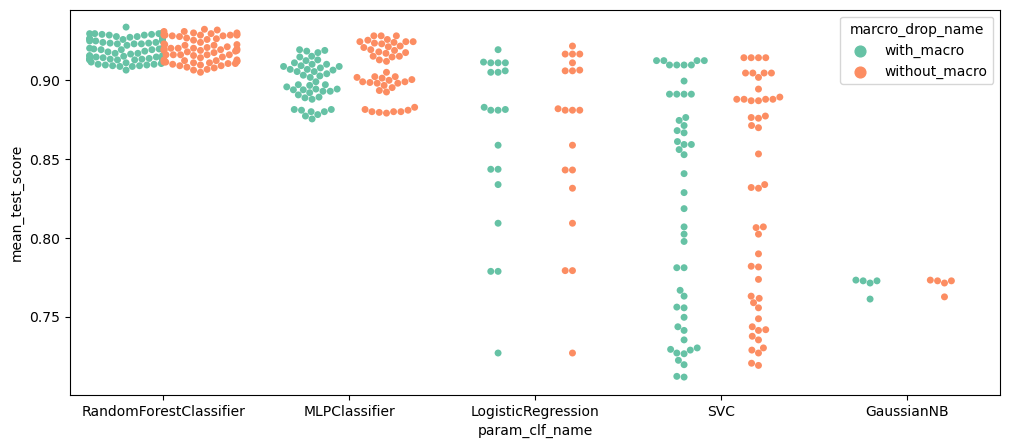

In [11]:
from model_utils import compare_models_plot
    
compare_models_plot(cv_results)

# Evaluation

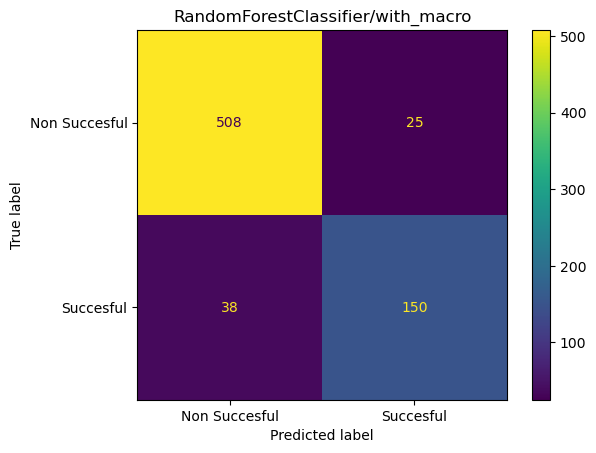

               precision    recall  f1-score   support

Non Succesful       0.93      0.95      0.94       533
    Succesful       0.86      0.80      0.83       188

     accuracy                           0.91       721
    macro avg       0.89      0.88      0.88       721
 weighted avg       0.91      0.91      0.91       721



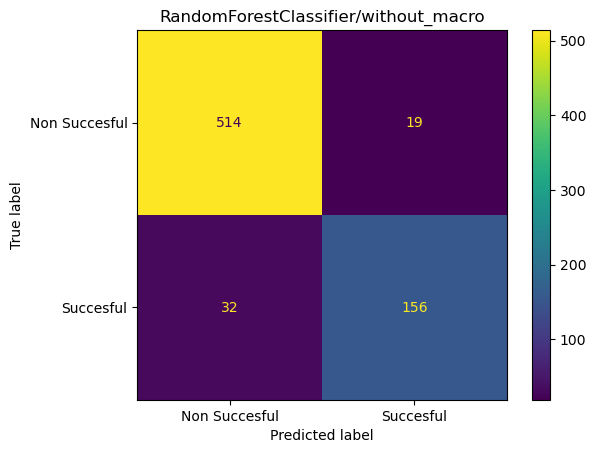

               precision    recall  f1-score   support

Non Succesful       0.94      0.96      0.95       533
    Succesful       0.89      0.83      0.86       188

     accuracy                           0.93       721
    macro avg       0.92      0.90      0.91       721
 weighted avg       0.93      0.93      0.93       721



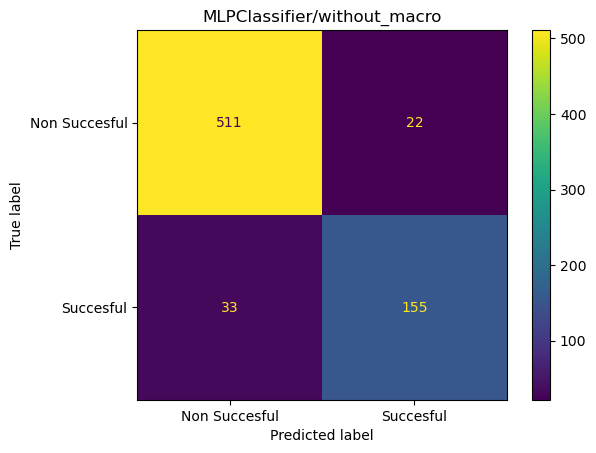

               precision    recall  f1-score   support

Non Succesful       0.94      0.96      0.95       533
    Succesful       0.88      0.82      0.85       188

     accuracy                           0.92       721
    macro avg       0.91      0.89      0.90       721
 weighted avg       0.92      0.92      0.92       721



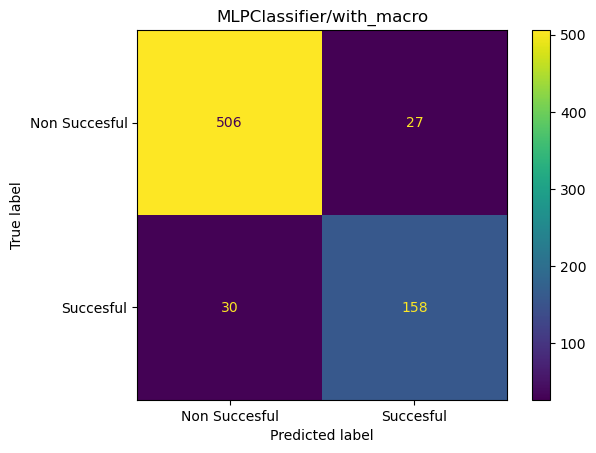

               precision    recall  f1-score   support

Non Succesful       0.94      0.95      0.95       533
    Succesful       0.85      0.84      0.85       188

     accuracy                           0.92       721
    macro avg       0.90      0.89      0.90       721
 weighted avg       0.92      0.92      0.92       721



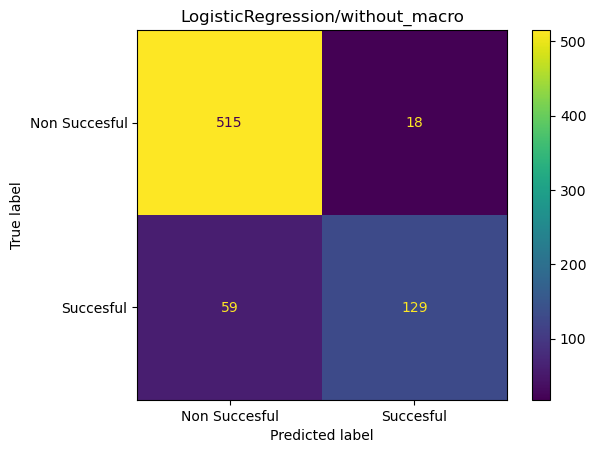

               precision    recall  f1-score   support

Non Succesful       0.90      0.97      0.93       533
    Succesful       0.88      0.69      0.77       188

     accuracy                           0.89       721
    macro avg       0.89      0.83      0.85       721
 weighted avg       0.89      0.89      0.89       721



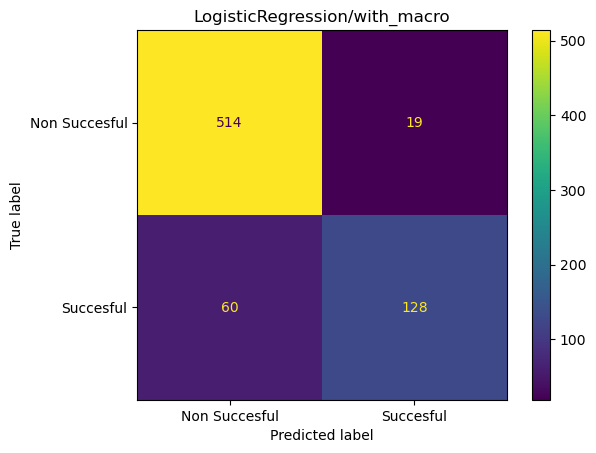

               precision    recall  f1-score   support

Non Succesful       0.90      0.96      0.93       533
    Succesful       0.87      0.68      0.76       188

     accuracy                           0.89       721
    macro avg       0.88      0.82      0.85       721
 weighted avg       0.89      0.89      0.89       721



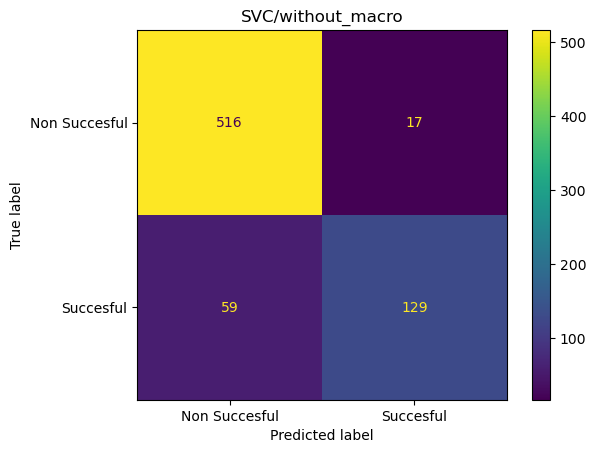

               precision    recall  f1-score   support

Non Succesful       0.90      0.97      0.93       533
    Succesful       0.88      0.69      0.77       188

     accuracy                           0.89       721
    macro avg       0.89      0.83      0.85       721
 weighted avg       0.89      0.89      0.89       721



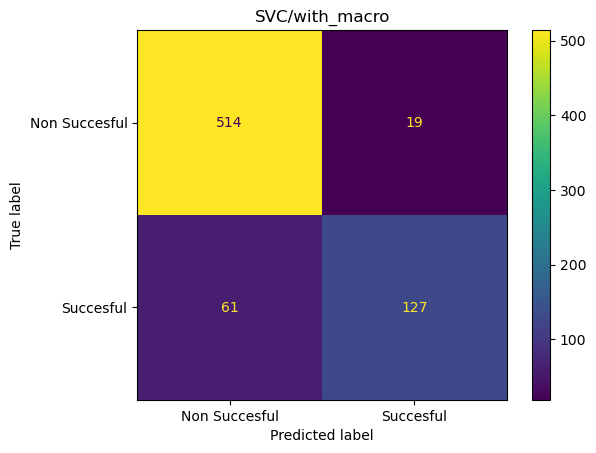

               precision    recall  f1-score   support

Non Succesful       0.89      0.96      0.93       533
    Succesful       0.87      0.68      0.76       188

     accuracy                           0.89       721
    macro avg       0.88      0.82      0.84       721
 weighted avg       0.89      0.89      0.88       721



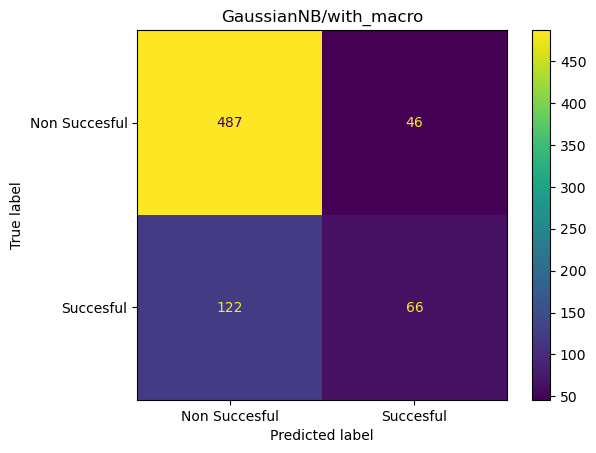

               precision    recall  f1-score   support

Non Succesful       0.80      0.91      0.85       533
    Succesful       0.59      0.35      0.44       188

     accuracy                           0.77       721
    macro avg       0.69      0.63      0.65       721
 weighted avg       0.74      0.77      0.75       721



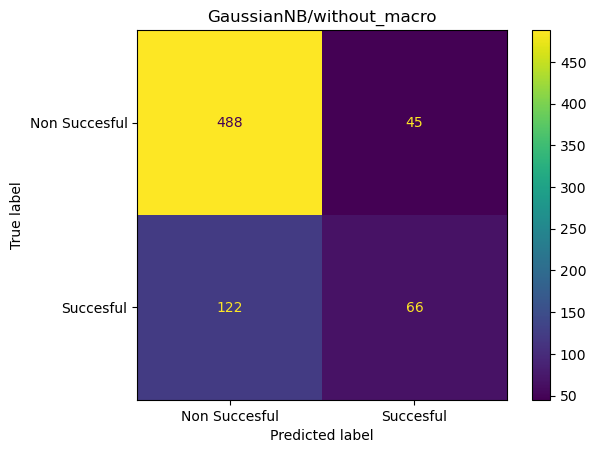

               precision    recall  f1-score   support

Non Succesful       0.80      0.92      0.85       533
    Succesful       0.59      0.35      0.44       188

     accuracy                           0.77       721
    macro avg       0.70      0.63      0.65       721
 weighted avg       0.75      0.77      0.75       721



In [12]:
from model_utils import evaluate_best_models
evaluate_best_models(cv_results, X_train_sel, y_train, X_test_sel, y_test)

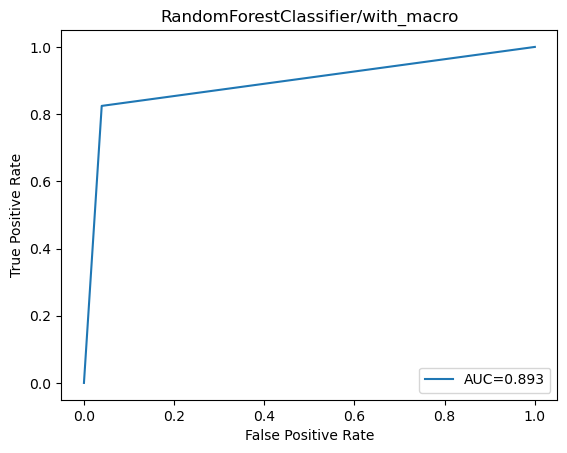

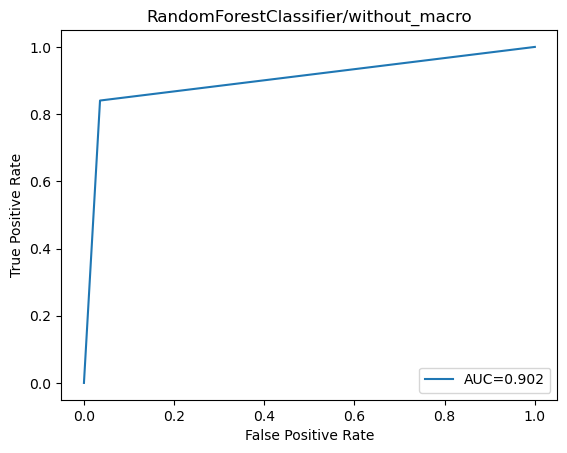

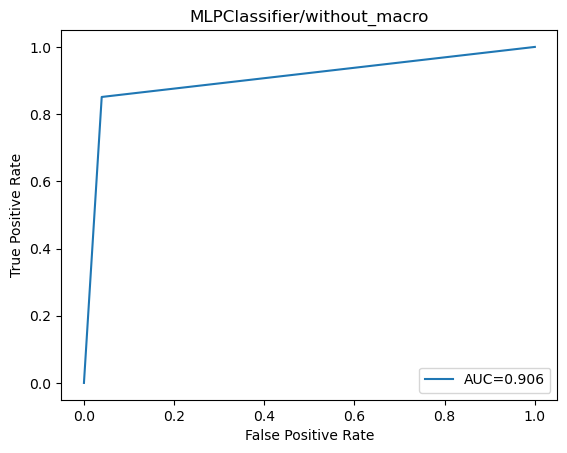

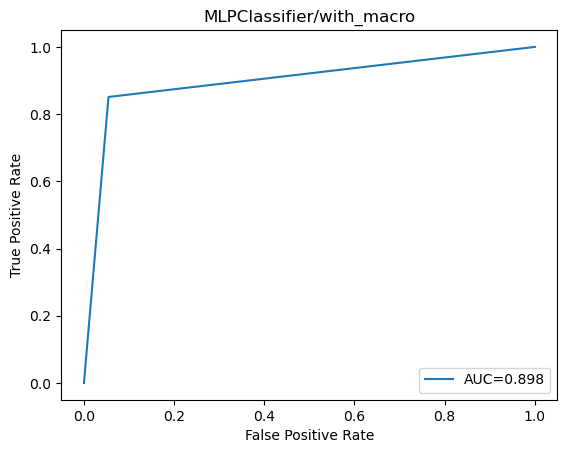

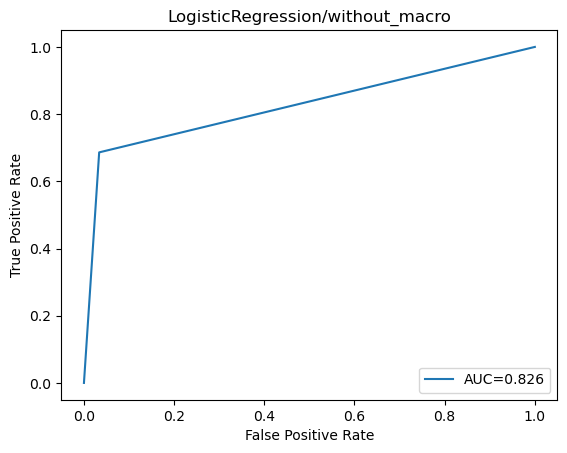

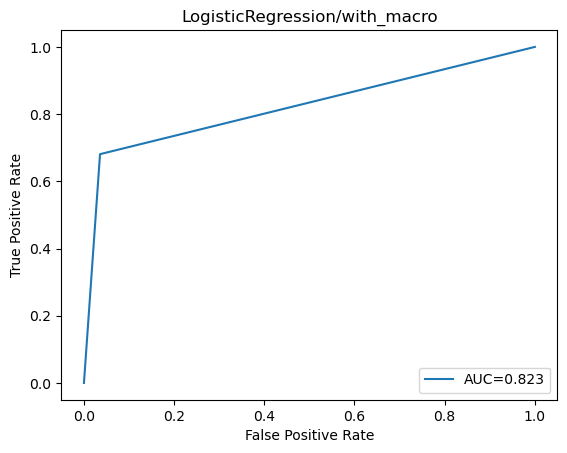

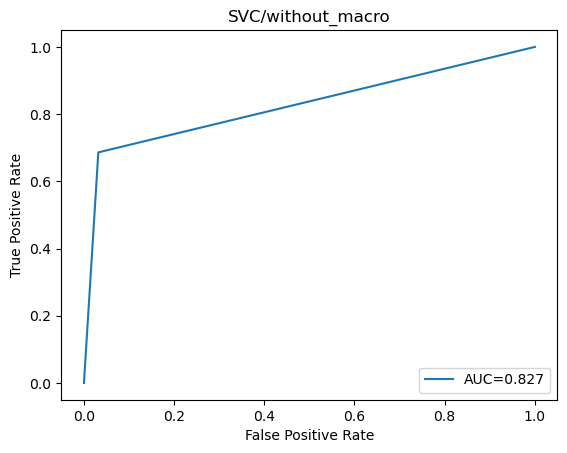

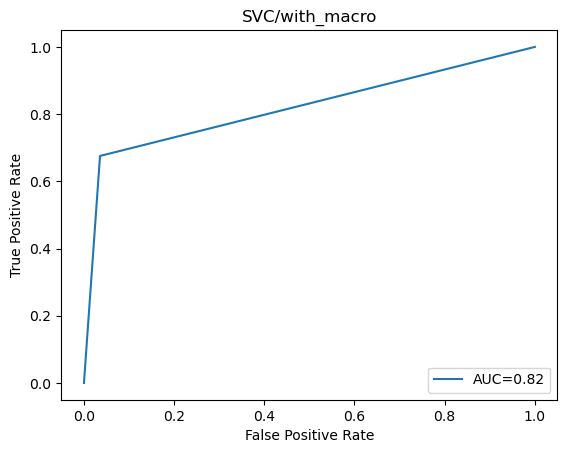

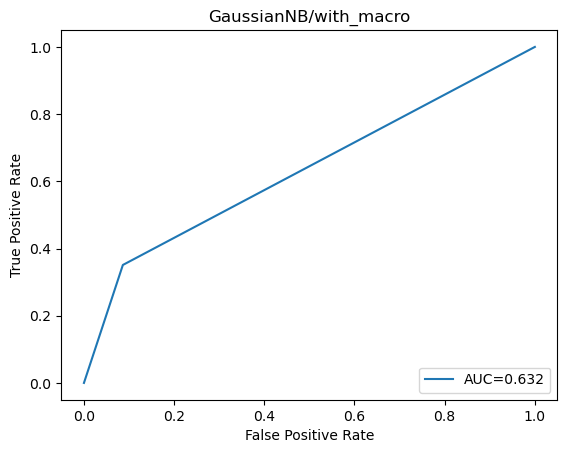

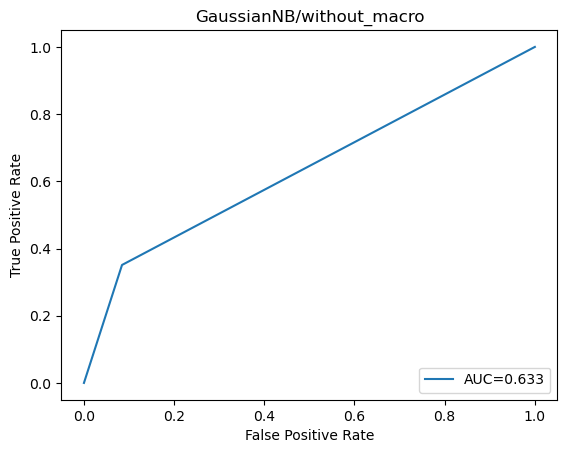

In [13]:
from model_utils import evaluate_best_models2
evaluate_best_models2(cv_results, X_train_sel, y_train, X_test_sel, y_test)

## BASELINE MODEL

In [14]:
# zero rule algorithm for classification
import pandas as pd
zero_rule = pd.Series([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,])
print(zero_rule)

0      0
1      0
2      0
3      0
4      0
      ..
716    0
717    0
718    0
719    0
720    0
Length: 721, dtype: int64


In [15]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, zero_rule)

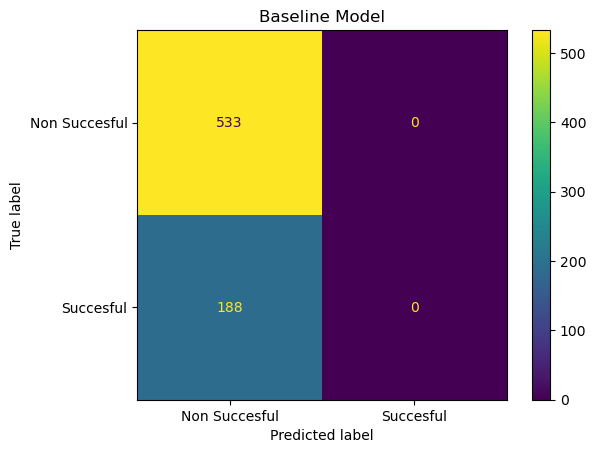

               precision    recall  f1-score   support

Non Succesful       0.74      1.00      0.85       533
    Succesful       0.00      0.00      0.00       188

     accuracy                           0.74       721
    macro avg       0.37      0.50      0.43       721
 weighted avg       0.55      0.74      0.63       721



In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

labels=[0, 1]
target_names=['Non Succesful', 'Succesful']

cm = confusion_matrix(y_true = y_test, y_pred = zero_rule, labels = labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot()
plt.title('Baseline Model')
plt.show()
print(classification_report(y_true=y_test, y_pred=zero_rule, target_names=target_names))

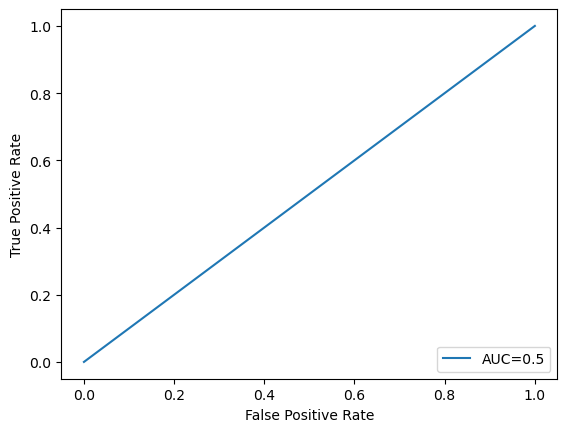

In [17]:
from sklearn import metrics
import matplotlib.pyplot as plt

fpr, tpr, _ = metrics.roc_curve(y_test, zero_rule)
auc = metrics.roc_auc_score(y_test, zero_rule)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## SHAP on the best performing model

In [36]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=20, min_samples_leaf=2)
model.fit(X_train_sel, y_train)
y_pred = model.predict(X_test_sel)

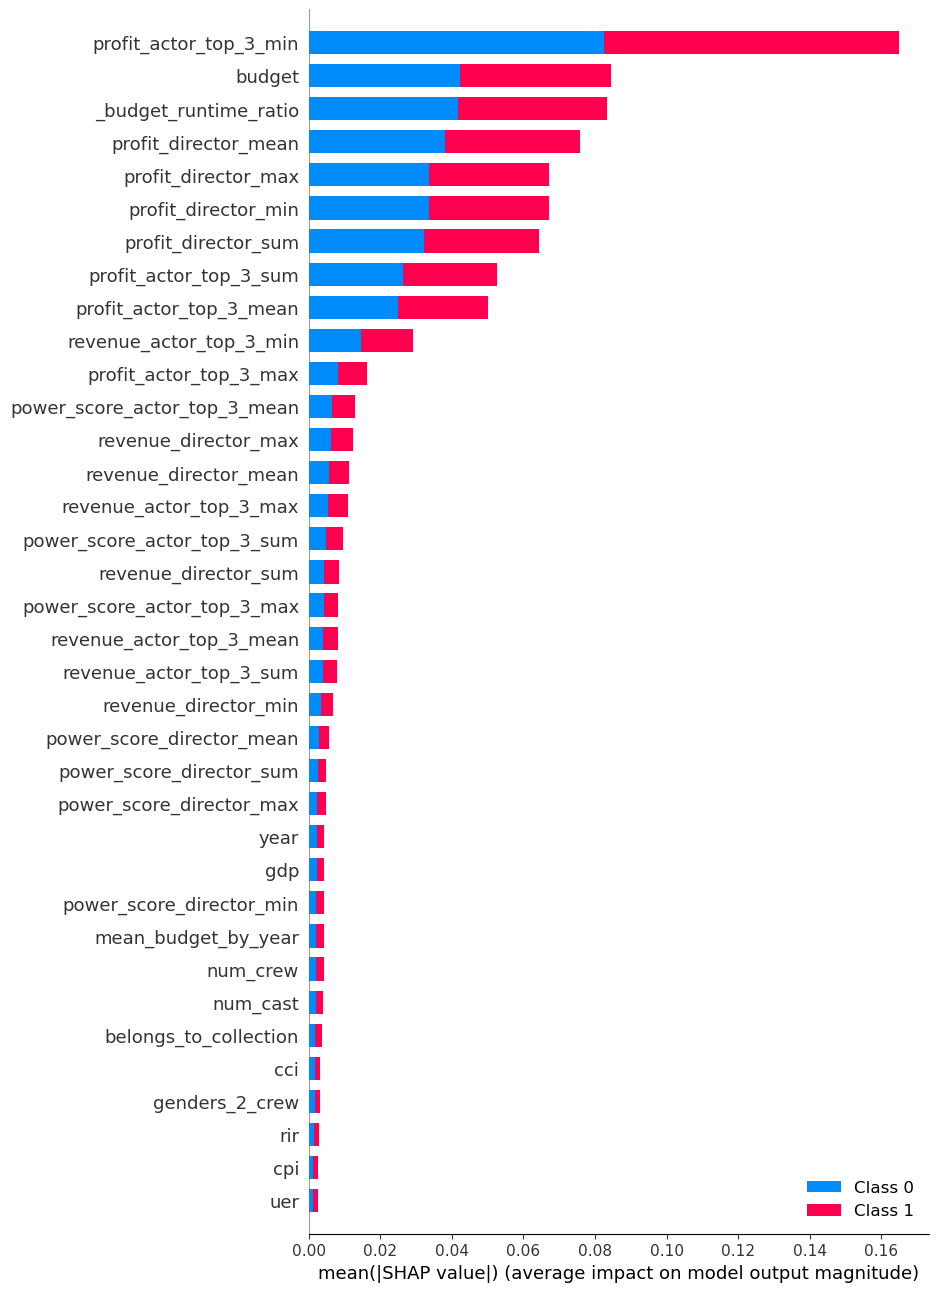

In [70]:
import shap
# explainer = shap.TreeExplainer(model)
# shap_values = explainer.shap_values(X_train_sel)

shap_values = shap.TreeExplainer(model).shap_values(X_train_sel)
shap.summary_plot(shap_values, X_train_sel, plot_type="bar", max_display=X_train_sel.shape[1])

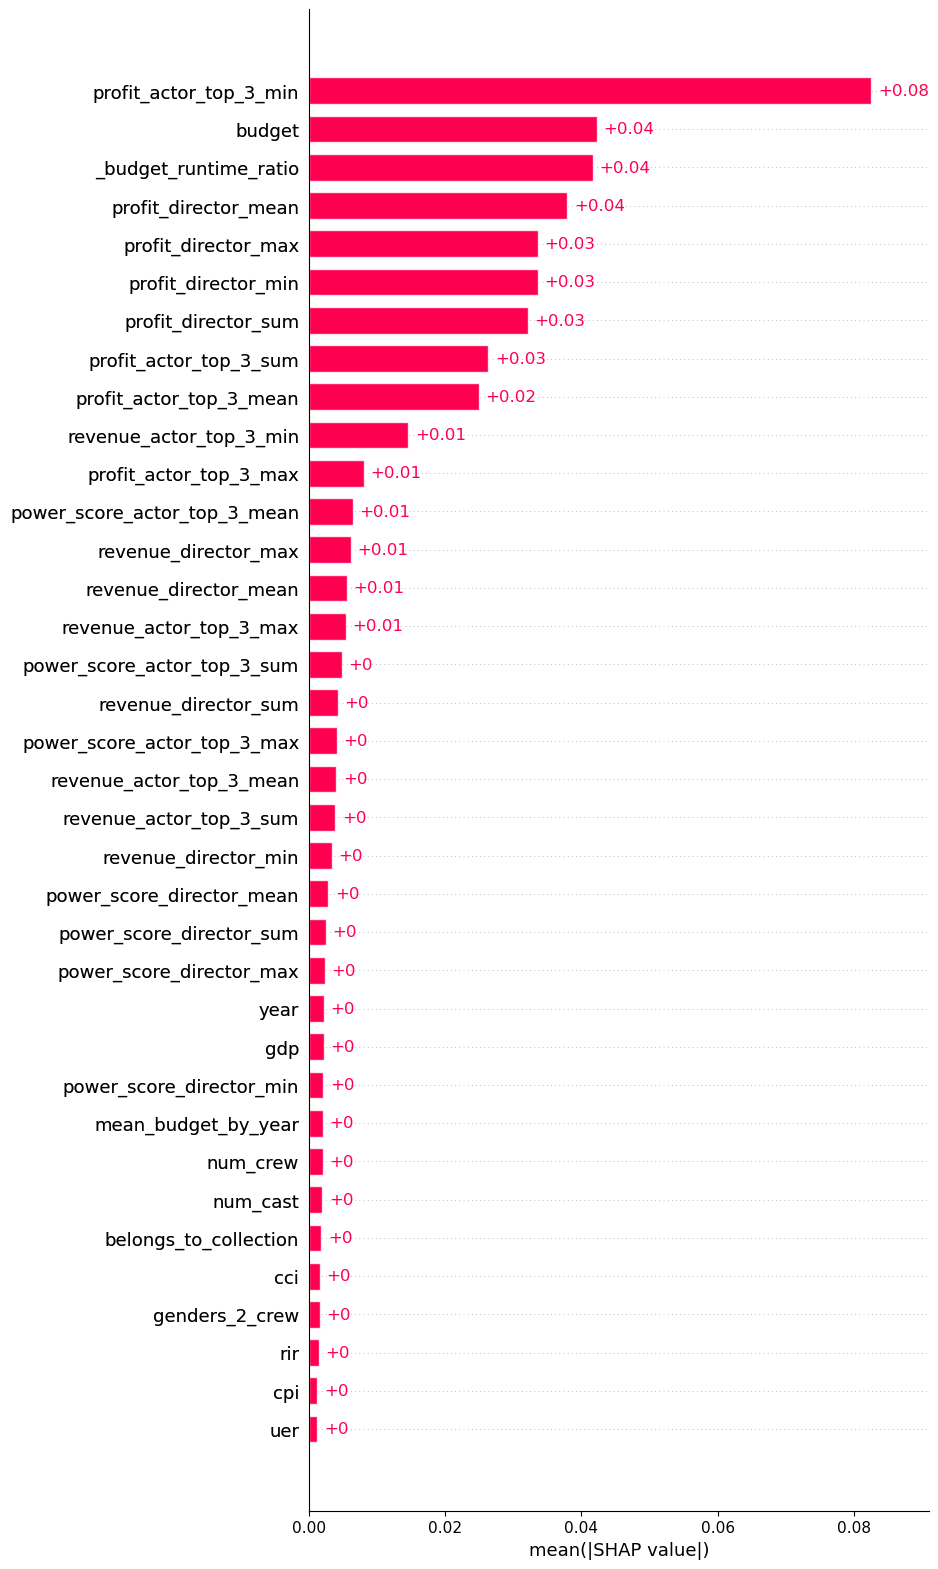

In [109]:
#import matplotlib.pyplot as plt

explainer = shap.Explainer(model)
shap_values2 = explainer(X_train_sel)
fig = shap.plots.bar(shap_values2[:, :, 0], max_display=X_train_sel.shape[1], show = False)
plt.savefig("images/shap_2.jpg", dpi=150, bbox_inches='tight')